In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
import joblib

In [4]:
from sklearn.datasets import fetch_california_housing

In [5]:
housing_data = fetch_california_housing()

In [6]:
print(housing_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
col_names = housing_data.feature_names
col_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
data = pd.DataFrame(housing_data.data, columns=col_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
786,3.8875,40.0,5.610390,1.324675,264.0,3.428571,37.64,-122.12
3998,3.0404,32.0,5.037162,1.199324,756.0,2.554054,34.17,-118.62
4379,2.3333,52.0,3.807370,1.110553,1480.0,2.479062,34.09,-118.28
11670,4.5000,28.0,5.102117,1.043587,2112.0,2.630137,33.84,-118.01
18105,6.6818,25.0,6.345000,1.000000,1678.0,2.796667,37.30,-122.04


In [10]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [11]:
housing_data.target_names

['MedHouseVal']

In [12]:
data['MedHouseVal'] = housing_data.target

In [13]:
data.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
16412,2.8676,30.0,6.205882,1.241176,629.0,3.700000,37.95,-121.22,0.769
12814,3.7188,8.0,5.010213,1.038450,7919.0,2.378792,38.62,-121.50,1.345
3167,1.9066,31.0,4.217570,1.024022,5666.0,3.888813,35.26,-118.90,0.546
902,4.6000,28.0,5.238889,1.048148,1610.0,2.981481,37.53,-121.98,2.232
14156,2.5125,42.0,4.807895,0.994737,880.0,2.315789,32.76,-117.07,1.766


In [14]:
data.to_csv('california_housing.csv', index=False)

In [15]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [16]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(20640, 9)

In [22]:
X = data.drop(['MedHouseVal'], axis=1)
y = data['MedHouseVal']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666, shuffle=True)

In [24]:
X_train.shape

(16512, 8)

In [25]:
X_test.shape

(4128, 8)

In [27]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

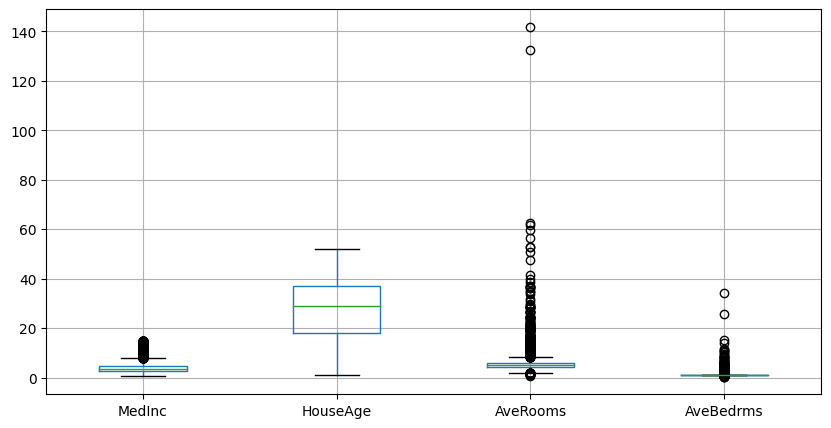

In [28]:
plt.figure(figsize=(10, 5))
data.boxplot(column=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',])
plt.show()

In [29]:
data[data['AveRooms']>=20].shape

(69, 9)

In [30]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.116846,0.319170,-0.061197,0.002839,0.021850,-0.079627,-0.015013
HouseAge,-0.116846,1.000000,-0.150010,-0.074067,-0.292521,0.012795,0.005927,-0.102560
AveRooms,0.319170,-0.150010,1.000000,0.854217,-0.072484,-0.008535,0.105857,-0.028308
AveBedrms,-0.061197,-0.074067,0.854217,1.000000,-0.064795,-0.006789,0.070774,0.010582
Population,0.002839,-0.292521,-0.072484,-0.064795,1.000000,0.063033,-0.108795,0.100166
AveOccup,0.021850,0.012795,-0.008535,-0.006789,0.063033,1.000000,0.006487,0.001432
Latitude,-0.079627,0.005927,0.105857,0.070774,-0.108795,0.006487,1.000000,-0.924894
Longitude,-0.015013,-0.102560,-0.028308,0.010582,0.100166,0.001432,-0.924894,1.000000


In [40]:
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

In [41]:
scaler = RobustScaler()

In [42]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model = RandomForestRegressor(n_jobs=-1)

In [46]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [47]:
y_pred = model.predict(X_test)

In [48]:
mean_absolute_error(y_test, y_pred)

0.3333502145348839

In [49]:
r2_score(y_test, y_pred)

0.8032379150605862

In [39]:
# aba aru scaler haru ni lagayera herne, ramro result aako wala lai select garne
# column haru falera herne ek choti feri... hit and trial garne